## GATES in Quantum Circuit

In [2]:
#importing the necessary libraries

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_bloch_multivector

#### Create account in IBM Quantum Computing Facility


In [2]:
IBMQ.load_account()

C:\Users\Monit Sharma\Documents\Anaconda\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## X Gate


An X gate equates to a rotation around the X-axis of the Bloch sphere by $\pi$ radians. It maps $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$. It is the quantum equivalent of the NOT gate for classical computers and is sometimes called a bit-flip

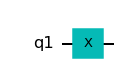

In [5]:
q = QuantumRegister(1)  # we define a single bit quantum register with |0>
qc = QuantumCircuit(q)  # declare and make a quantum circuit
qc.x(q[0])              # applying the X gate onto the bit
qc.draw(output='mpl')   # draw the output circuit

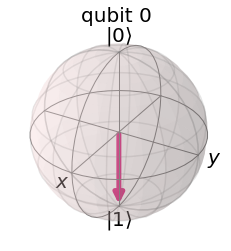

In [6]:
## bloch sphere representation

backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

## Hadamard Gate (H Gate)




A Hadamard gate represents a rotation of $\pi$ about the axis that is in the middle of the $X$-axis and $Z$-axis. It maps the basis state $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, which means that a measurement will have equal probabilities of being 1 or 0, creating a 'superposition' of states. This state is also written as $|+\rangle$

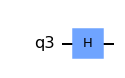

In [7]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.draw(output='mpl')

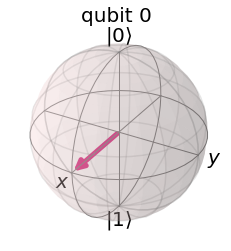

In [8]:
## bloch sphere representation using statevector simulator

backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

## Z gate


The Z gate represents a rotation around the Z-axis of the Bloch sphere by $\pi$ radians. It is sometimes called a 'phase shift gate

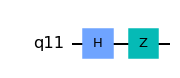

In [14]:
## here we are doing a Z gate on a |+> state by first applying the Hadamard gate and then the Z gate


q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.z(q[0])
qc.draw(output='mpl')

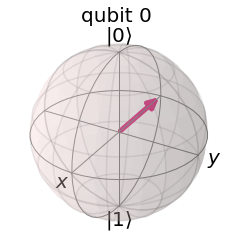

In [15]:
### BLoch Sphere Representation of Z gate applied on a |+> state
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

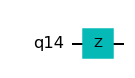

In [16]:
## applying the Z gate on simply the |0> qubit

q = QuantumRegister(1)
qc = QuantumCircuit(q)

qc.z(q[0])
qc.draw(output='mpl')

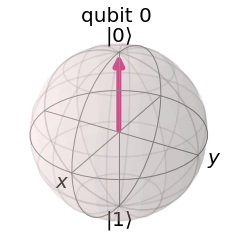

In [17]:
## bloch sphere representation of the Z gate acting on |0> qubit

backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

## CNOT or CX gate

The controlled NOT (or CNOT or CX) gate acts on two qubits. It performs the NOT operation (equivalent to applying an X gate) on the second qubit only when the first qubit is $|1\rangle$ and otherwise leaves it unchanged.

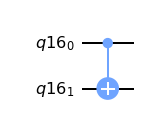

In [18]:
## making the circuit

q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])  ## writing two qubits since it works on two qubits
qc.draw(output='mpl')

## CZ gate

The CZ gate acts on two qubits, called a 'control bit' and a 'target bit'. It flips the sign (equivalent to applying the phase shift Z gate) of the target qubit if and only if the control qubit is $|1\rangle$.

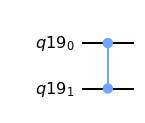

In [21]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])  ## takes the input from first qubit and change the second qubit only when the output from first is |1>
qc.draw(output='mpl')

### CZ Gate using the CX and the H gate 

We can also construct the Controlled Z gate using the Controlled X and the Hadamard gate



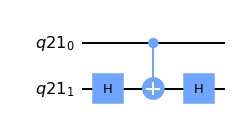

In [23]:
q = QuantumRegister(2)  # taking two Registers
qc = QuantumCircuit(q)

qc.h(q[1])  #applying the Hadamard gate on second register
qc.cx(q[0],q[1])  #APPLYING the CNOT gate 
qc.h(q[1])    ## applying Hadamard gate on the second qubit again
qc.draw(output='mpl')

## CCX Gate

The CCX gate is also called a Toffoli gate. The CCX gate is a three-bit gate, with two controls and one target as their input and output. If the first two bits are in the state $|1\rangle$, it applies a Pauli-X (or NOT) on the third bit. Otherwise, it does nothing.

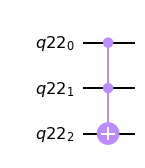

In [24]:

## doing a CCX Gate on |000>

q = QuantumRegister(3)  ## definig a 3 register quantum Circuit
qc = QuantumCircuit(q)
qc.ccx(q[0],q[1],q[2])  ## applying the CCX gate on them
qc.draw(output='mpl')

# Logical GATES using Quantum GATES

## NOT Gate

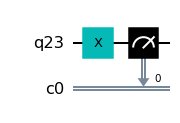

In [25]:

# Create a Quantum Circuit with 1 quantum register and 1 classical register
q = QuantumRegister(1) # one quantum register
c = ClassicalRegister(1) # one classical register
qc = QuantumCircuit(q,c)  # combining the two to make a Quantum Circuit
qc.x(q[0])  ## applying an X gate which is equivalet to logical NOT gate
qc.measure(q[0], c[0])    # Map the quantum measurement to the classical bits
qc.draw(output='mpl')

## AND Gate

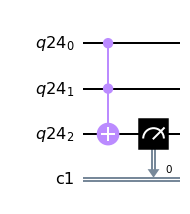

In [26]:
q = QuantumRegister(3) ## defining a 3 register Quantum Register
c = ClassicalRegister(1) ## and one bit classical Register
qc = QuantumCircuit(q,c) ## making the circuit of the Two
qc.ccx(q[0], q[1], q[2])  ## applyin the Controlled Controlled Not Gate on the 3 qubits
qc.measure(q[2], c[0])   ## measure the circuit
qc.draw(output='mpl')

## NAND Gate

A NAND gate can be made by applying a NOT gate after applying an AND gate

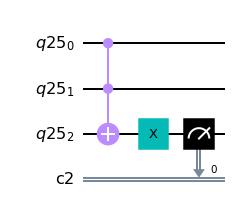

In [27]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.ccx(q[0], q[1], q[2])  ## applying the Quantum CCX Gate which is Equivalent of Logical AND gate
qc.x(q[2])  ## then applying the Quantum X gate which is equivalent to Logical NOT gate
qc.measure(q[2], c[0]) # measure the circuit
qc.draw(output='mpl')

## OR Gate

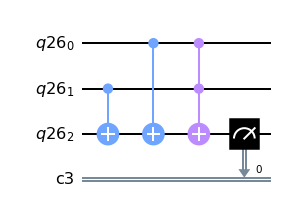

In [28]:
## an OR Gate can be formed by applying Controlled Not on separate 2 qubits and then a CCX gate on all three
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])  # applying the Controlled Not Gate on the Second and The Third Qubit
qc.cx(q[0], q[2]) # applying the Controlled Not Gayte on the First and the Third Qubit
qc.ccx(q[0], q[1], q[2]) # applying the Controlled Controlled Not gate on all three Qubits
qc.measure(q[2], c[0]) # measure the Quantum Circuit
qc.draw(output='mpl')

## XOR Gate

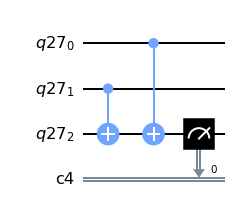

In [29]:

q = QuantumRegister(3)  ## making a Quantum Register with Three Qubits
c = ClassicalRegister(1) ## making a Classical Register
qc = QuantumCircuit(q,c) # making a Quantum Circuit
qc.cx(q[1], q[2]) ## applying a CNOT gate on second and third qubit
qc.cx(q[0], q[2]) ## applying a CNOT gate on first and third qubit
qc.measure(q[2], c[0])  ## measuring the Quantum Circuit
qc.draw(output='mpl')

## NOR Gate

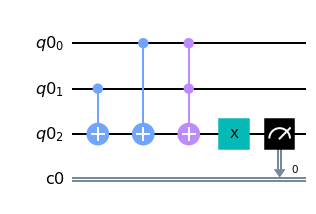

In [3]:
q = QuantumRegister(3)   ## making a 3 qubit quantum register
c = ClassicalRegister(1) ## getting a classical bit
qc = QuantumCircuit(q,c)  ## making the quantum circuit

qc.cx(q[1], q[2])  #applying a CNOT gate on second and third qubit
qc.cx(q[0], q[2]) ## applying a CNOT gate on first and third qubit
qc.ccx(q[0], q[1], q[2]) ## applying a CCnot gate on all qubits
qc.x(q[2]) ## applying a NOT gate on third qubiy
qc.measure(q[2], c[0]) #measure the third qubit
qc.draw(output='mpl')  ##draw the whole circuit

# ADDER

An adder is a digital logic circuit that performs addition of numbers.

## Half Adder
The half adder is used to add together the two least significant digits in a binary sum. It has two single binary inputs, called A and B, and two outputs C (carry out) and S (sum). The output C will be used as an input to the Full Adder, for obtaining the value in the higher digit.


the carry output, C, is a result of operating an AND gate against A and B, where the output S is a result of operating an XOR against A and B. As we have already created the AND and XOR gates, we can combine these gates and create a half adder as follows.

{'00': 1024}


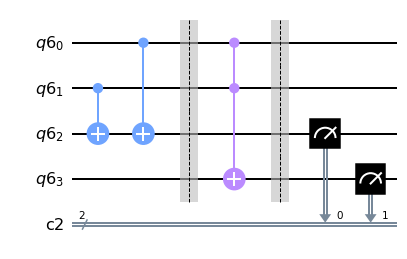

In [5]:
#Define registers and a quantum circuit
q = QuantumRegister(4)   ## defining a 4 qubit quantum register
c = ClassicalRegister(2) ## a 2 classical bit because we'll get two outputs
qc = QuantumCircuit(q,c)

#Start by first making a XOR gate
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.barrier()

#make an AND gate
qc.ccx(q[0], q[1], q[3])
qc.barrier()

#Sum their outputs
qc.measure(q[2], c[0])
#Carry out
qc.measure(q[3], c[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
count =result.get_counts()
print(count)  ## prints the state we are getting and the frequency of that state
qc.draw(output='mpl')

## Quantum Cost Calculation


There are several ways to evaluate an efficiency of a program (quantum circuit). Such as:

<li>Number of quantum bits
<li>Depth
<li>Program execution speed (Runtime)
<li>Number of instructions

    
    
   These are all important factors that impact the results and throughput of quantum computation. We will use the number of instructions to evaluate the efficiency of our program. We will call the number of instructions "cost" throughout and will use the following formula to evaluate the cost of a circuit.

Cost $=$ Single-qubit gates $+$ CX gates $\times 10$

Any given quantum circuit can be decomposed into single-qubit gates (an instruction given to a single qubit) and two-qubit gates. With the current Noisy Intermediate-Scale Quantum (NISQ) devices, CX gate error rates are generally 10x higher than a single qubit gate. Therefore, we will weigh CX gates 10 times more than a single-qubit gate for cost evaluation.

In [8]:
## importing the necessary libraries

import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, process_fidelity


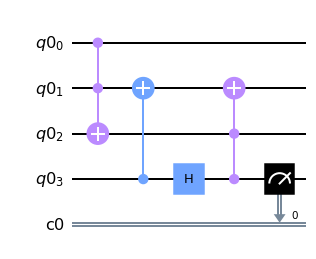

In [7]:
## making a 4 qubit quantum circuit
q = QuantumRegister(4, 'q0') 
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)

## applying the quantum gates
qc.ccx(q[0], q[1], q[2])  ## applying a CCNot gate
qc.cx(q[3], q[1]) ##applying a CNOT gate on fourth and second qubit(input from fourth and flip the second)
qc.h(q[3])   ## applying a HAdamard gate on the fourth qubit
qc.ccx(q[3], q[2], q[1]) ## applying the CCNOT gate 

## Measurement
qc.measure(q[3],c[0])  ##measuring the fourth qubit 
qc.draw(output='mpl')

In [9]:
## this command shows the GATES applied on the Quantum Circuit  in order and their output projected on whichh qubit

qc.count_ops()

OrderedDict([('ccx', 2), ('cx', 1), ('h', 1), ('measure', 1)])


As you can see, this quantum circuit contains a Hadamard gate, a CX gate and CCX gates. By using qiskit.transpiler and importing PassManager, we can decompose this circuit into gates specified by the Unroller as shown below. In this case, into U3 gates and CX gates.


In [10]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller

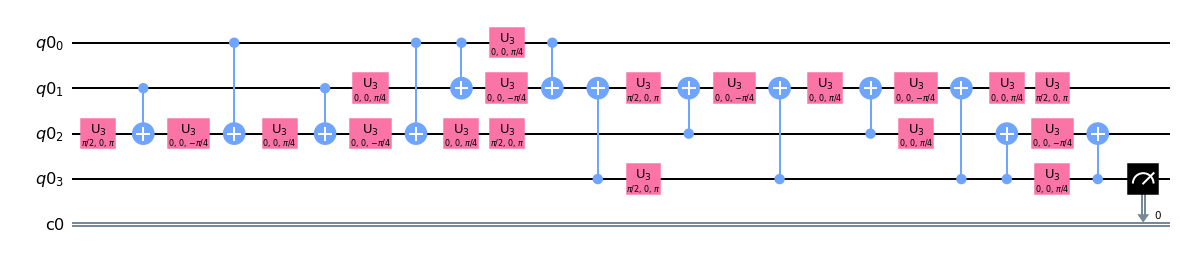

In [11]:
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc)   ## name the Unrolled circuit as new_circuit
new_circuit.draw(output='mpl')

In [12]:
new_circuit.count_ops()  ##checking the GATES now

OrderedDict([('u3', 19), ('cx', 13), ('measure', 1)])

Hence Now the Cost of the Circuit will be
<li>Cost = $Number of U3 gates + Number of CX gates$ $\times10$
    <li> Cost =  $19+13\times10=149$
       

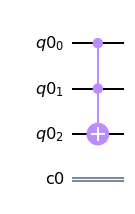

In [14]:
### trying the Unroller onto a new Circuit

## a three Qubit Quantum Computer
q = QuantumRegister(3, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2]) ## applying a CCNOT gate on the circuit
qc.draw(output='mpl')

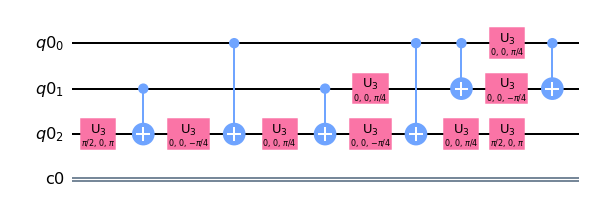

In [15]:
### applying the Unroller

pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [17]:
new_circuit.count_ops()

OrderedDict([('u3', 9), ('cx', 6)])

So, the total cost of a CCX gate can be calculated as $9+6\times10=69$